In [1]:
from NoisyCircuits.utils.BuildQubitGateModelParallel import BuildModel
import pickle
import numpy as np
import matplotlib.pyplot as plt

2026-02-03 16:30:58,980	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
with open("../noise_models/Noise_Model_Heron_QPU.pkl", "rb") as f:
    noise_model = pickle.load(f)

In [3]:
data = {
    "qubits" : [],
    "single_qubit_extraction_time" : [[], []],
    "two_qubit_extraction_time" : [[], []],
    "measurement_extraction_time" : [[], []],   
    "single_qubit_error_postprocessing_time": [[], []],
    "two_qubit_error_postprocessing_time": [[], []],
    "two_qubit_error_operator_construction_time": [[], []],
    "connectivity_map_construction_time": [[], []],
}

for qubits in range(2, 15):
    trial_data = {
        "single_qubit_extraction_time" : [],
        "two_qubit_extraction_time" : [],
        "measurement_extraction_time" : [],   
        "single_qubit_error_postprocessing_time": [],
        "two_qubit_error_postprocessing_time": [],
        "two_qubit_error_operator_construction_time": [],
        "connectivity_map_construction_time": [],
    }
    for _ in range(3):
        vals = BuildModel(
            noise_model=noise_model,
            num_qubits=qubits,
            num_cores=2,
            threshold=1e-15,
            basis_gates=[["sx", "x", "rz", "rx"], ["cz", "rzz"]],
            verbose=False).build_qubit_gate_model()
        for key in vals[-1]:
            trial_data[key].append(vals[-1][key])
    data["qubits"].append(qubits)
    for key in trial_data:
        data[key][0].append(np.mean(trial_data[key]))
        data[key][1].append(np.std(trial_data[key]))
    print(f"Completed data for {qubits} qubits.")
    print("Mean Runtimes: ")
    for key in trial_data.keys():
        print(f"{key}: {data[key][0][-1]/1e9} ± {data[key][1][-1]/1e9} s")
    print("-----"*40)

Completed data for 2 qubits.
Mean Runtimes: 
single_qubit_extraction_time: 0.007149493333333333 ± 0.0015864557152179054 s
two_qubit_extraction_time: 0.0022604466666666665 ± 0.0005334242984856322 s
measurement_extraction_time: 0.000367673 ± 4.997725244548764e-05 s
single_qubit_error_postprocessing_time: 0.023398064333333333 ± 0.0013300553406412163 s
two_qubit_error_postprocessing_time: 0.000406053 ± 3.164090488592259e-05 s
two_qubit_error_operator_construction_time: 0.07543135133333333 ± 0.00042235433254818425 s
connectivity_map_construction_time: 6.946666666666667e-06 ± 2.4130390704577405e-06 s
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Completed data for 3 qubits.
Mean Runtimes: 
single_qubit_extraction_time: 0.00664928 ± 0.0005203973130855564 s
two_qubit_extraction_time: 0.0031898936666666664 ± 0.00010390350803296083 s
measureme

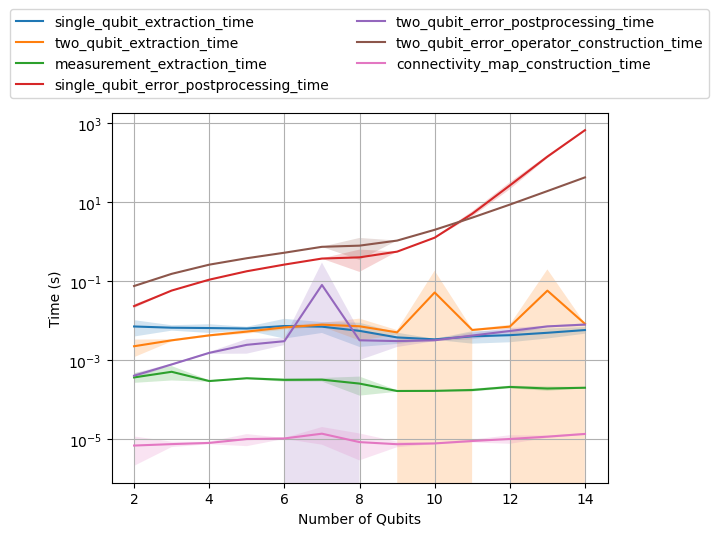

In [4]:
key_names = list(data.keys())
key_names.pop(0)
for key in key_names:
    plt.semilogy(data["qubits"], np.array(data[key][0])/1e9, label=key)
    plt.fill_between(data["qubits"], 
                     np.array(data[key][0])/1e9 - 2*np.array(data[key][1])/1e9,
                     np.array(data[key][0])/1e9 + 2*np.array(data[key][1])/1e9, alpha=0.2)
plt.xlabel("Number of Qubits")
plt.ylabel("Time (s)")
plt.grid()
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2)
plt.show()